In [6]:
!conda install -c conda-forge fbprophet -y

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: / ^C
failed with initial frozen solve. Retrying with flexible solve.

CondaError: KeyboardInterrupt



In [49]:
pip install plot_components_plotly


ERROR: Could not find a version that satisfies the requirement plot_components_plotly (from versions: none)
ERROR: No matching distribution found for plot_components_plotly
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
from prophet import Prophet
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

/Users/heshan/opt/anaconda3/envs/ox/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [22]:
# df1 = pd.read_csv("2000-2012formated.csv",index_col=[0],parse_dates=[0])
# df1.head()
df1 = pd.read_csv("2000-2023.csv")
df1=df1.loc[df1['town']=='BEDOK']
df1=df1.loc[df1['flat_type']=='2 ROOM']

# df1[df1['town']=="GEYLANG"]
df1 = df1.drop('town',axis=1)
df1 = df1.drop('flat_type',axis=1)
df1 = df1.drop('block',axis=1)
df1 = df1.drop('street_name',axis=1)
df1 = df1.drop('storey_range',axis=1)
df1 = df1.drop('floor_area_sqm',axis=1)
df1 = df1.drop('flat_model',axis=1)
df1 = df1.drop('lease_commence_date',axis=1)
df1 = df1.drop('remaining_lease',axis=1)
# df1 = pd.read_csv("2000-2012formated.csv",index_col=[0],parse_dates=[0])
df1.head()

,month,resale_price
157,2000-01,120000.0
158,2000-01,96000.0
159,2000-01,126500.0
160,2000-01,118000.0
2537,2000-02,112000.0


In [10]:
%pip install prophet

Note: you may need to restart the kernel to use updated packages.


In [14]:
import pandas as pd
from prophet import Prophet

In [23]:
df1.rename(columns={"month": "ds"}, inplace=True)
df1.rename(columns={"resale_price": "y"}, inplace=True)
df1.head()

,ds,y
157,2000-01,120000.0
158,2000-01,96000.0
159,2000-01,126500.0
160,2000-01,118000.0
2537,2000-02,112000.0


In [24]:
m = Prophet()
m.fit(df1)

08:14:40 - cmdstanpy - INFO - Chain [1] start processing
08:14:42 - cmdstanpy - INFO - Chain [1] done processing


In [40]:
#set 12 month prediction
future = m.make_future_dataframe(periods=24,freq='MS')

In [41]:
future

,ds
0,2000-01-01
1,2000-02-01
2,2000-03-01
3,2000-04-01
4,2000-06-01
...,...
251,2025-05-01
252,2025-06-01
253,2025-07-01
254,2025-08-01


In [42]:
len(df1)

515

In [43]:
len(future)

256

In [45]:
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2000-01-01,101175.355000,79055.535192,123686.390636,101175.355000,101175.355000,951.135417,951.135417,951.135417,951.135417,951.135417,951.135417,0.0,0.0,0.0,102126.490417
1,2000-02-01,101181.845111,81080.539481,125671.130306,101181.845111,101181.845111,1120.364717,1120.364717,1120.364717,1120.364717,1120.364717,1120.364717,0.0,0.0,0.0,102302.209828
2,2000-03-01,101187.916505,76451.120295,123747.413899,101187.916505,101187.916505,-1876.890234,-1876.890234,-1876.890234,-1876.890234,-1876.890234,-1876.890234,0.0,0.0,0.0,99311.026271
3,2000-04-01,101194.406616,79626.193068,123897.949534,101194.406616,101194.406616,-35.944662,-35.944662,-35.944662,-35.944662,-35.944662,-35.944662,0.0,0.0,0.0,101158.461954
4,2000-06-01,101207.177479,70306.345151,117590.288329,101207.177479,101207.177479,-7751.677858,-7751.677858,-7751.677858,-7751.677858,-7751.677858,-7751.677858,0.0,0.0,0.0,93455.499621


In [31]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'yearly', 'yearly_lower', 'yearly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [46]:
forecast[['ds','yhat_lower','yhat_upper','yhat']].tail(5)

,ds,yhat_lower,yhat_upper,yhat
251,2025-05-01,267731.513075,315754.782711,292200.672196
252,2025-06-01,264514.362025,312765.967624,286873.155439
253,2025-07-01,270051.778897,314634.496597,290830.220870
254,2025-08-01,270130.082120,319772.882274,294661.964336
255,2025-09-01,276306.333706,326281.242752,301238.461525


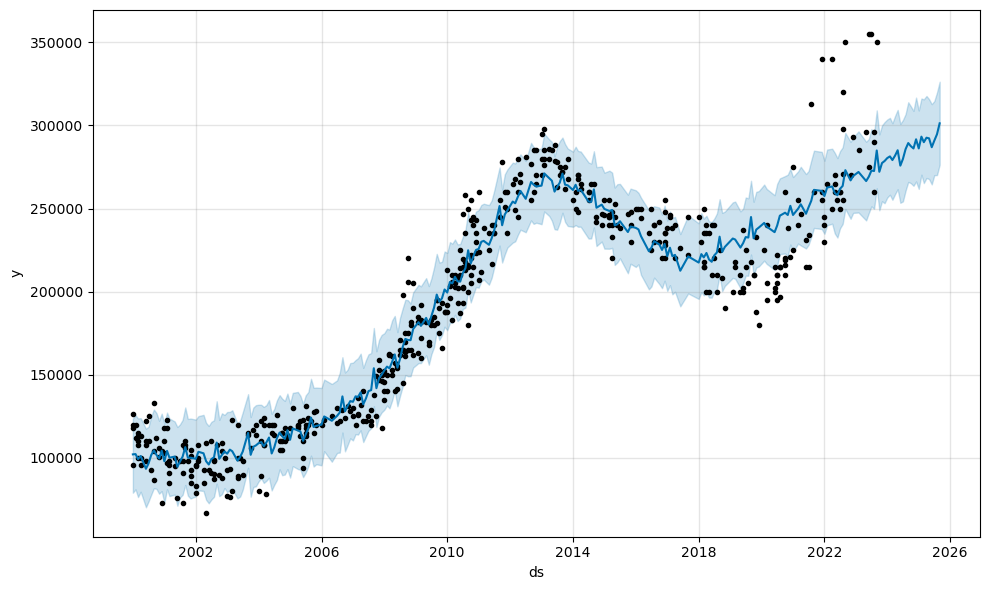

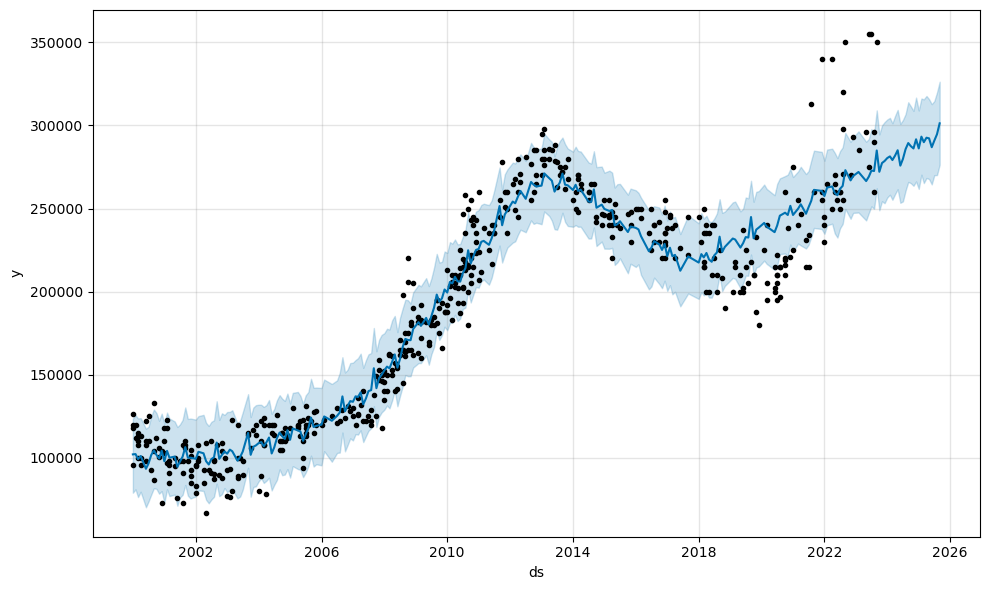

In [47]:
m.plot(forecast)

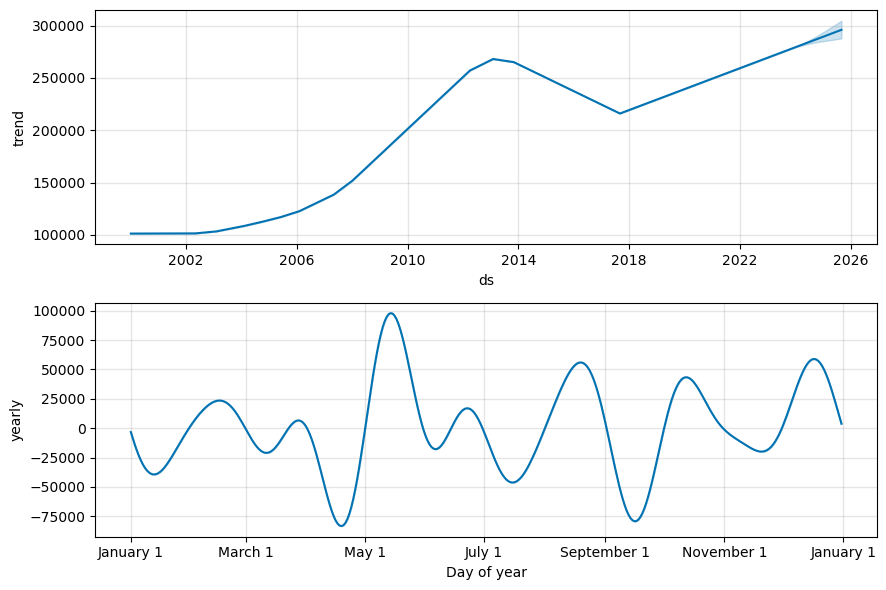

In [50]:
fig2 = m.plot_components(forecast)

In [48]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

NameError: name 'go' is not defined

ConversionError: Failed to convert value(s) to axis units: '\t2020-09-01'

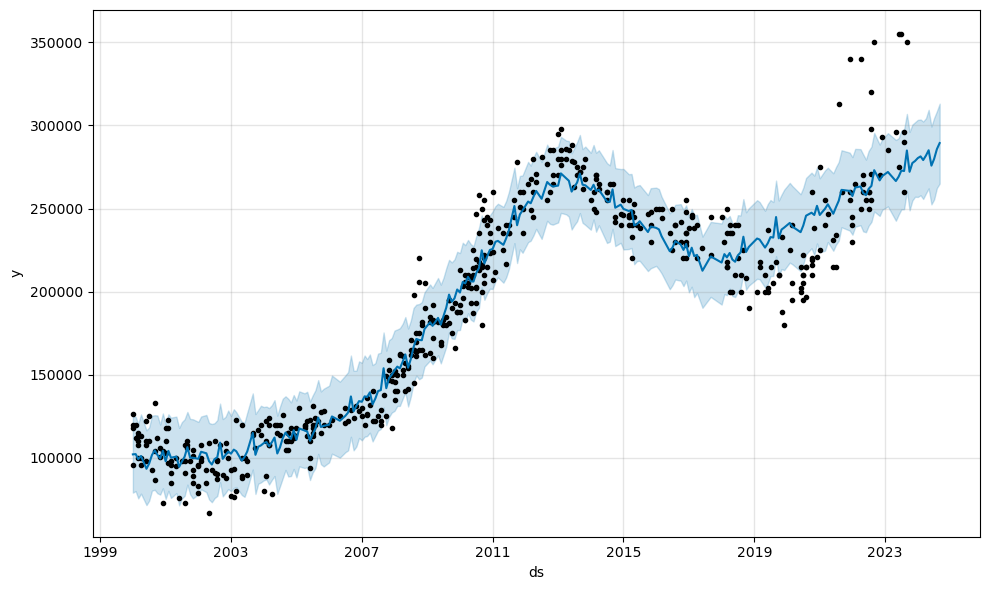

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline
m.plot(forecast)
plt.xlim('	2020-09-01','2024-09-01')

In [28]:
df1.to_csv("Bedok2room.csv", encoding='utf-8', index=False)

In [15]:
pjme = pd.read_csv('Bedok2room.csv',
                   index_col=[0],
                  parse_dates=[0])
pjme.head()

,resale_price
month,
2000-01-01,120000.0
2000-01-01,96000.0
2000-01-01,126500.0
2000-01-01,118000.0
2000-02-01,112000.0


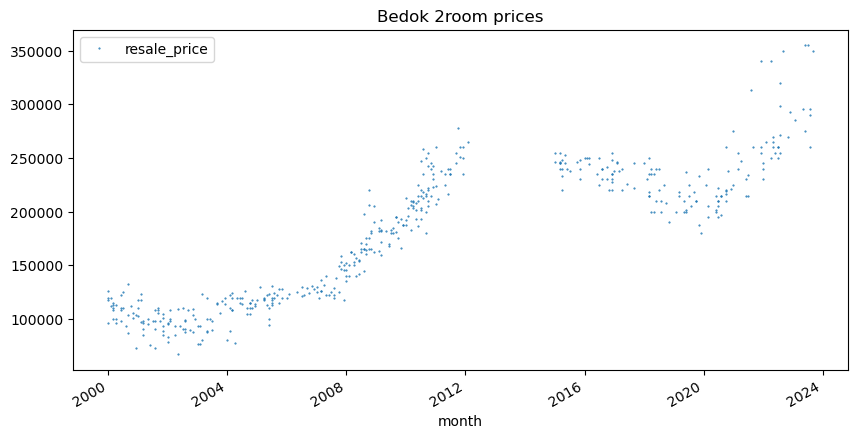

In [30]:
color_pal = sns.color_palette()
pjme.plot(style='.',
          figsize=(10, 5),
          ms=1,
          color=color_pal[0],
          title='Bedok 2room prices')
plt.show()

In [11]:
# df1 = pd.read_csv("2000-2012formated.csv",index_col=[0],parse_dates=[0])
# df1.head()
df0 = pd.read_csv("2000-2023.csv")
#withount any filter

# df1[df1['town']=="GEYLANG"]
df0 = df0.drop('town',axis=1)
df0 = df0.drop('flat_type',axis=1)
df0 = df0.drop('block',axis=1)
df0 = df0.drop('street_name',axis=1)
df0 = df0.drop('storey_range',axis=1)
df0 = df0.drop('floor_area_sqm',axis=1)
df0 = df0.drop('flat_model',axis=1)
df0 = df0.drop('lease_commence_date',axis=1)
df0 = df0.drop('remaining_lease',axis=1)
# df1 = pd.read_csv("2000-2012formated.csv",index_col=[0],parse_dates=[0])
df0.head()

,month,resale_price
0,2000-01,147000.0
1,2000-01,144000.0
2,2000-01,159000.0
3,2000-01,167000.0
4,2000-01,163000.0


In [12]:
df0.head()

,month,resale_price
0,2000-01,147000.0
1,2000-01,144000.0
2,2000-01,159000.0
3,2000-01,167000.0
4,2000-01,163000.0


In [13]:
df0.to_csv("house_pirce.csv", encoding='utf-8', index=False)

In [14]:
pjme0 = pd.read_csv('house_pirce.csv',
                   index_col=[0],
                  parse_dates=[0])
pjme0.head()

,resale_price
month,
2000-01-01,147000.0
2000-01-01,144000.0
2000-01-01,159000.0
2000-01-01,167000.0
2000-01-01,163000.0


/var/folders/m8/p0w2_kwn4y1c4prddbt9zf6r0000gn/T/ipykernel_28690/3653836601.py:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


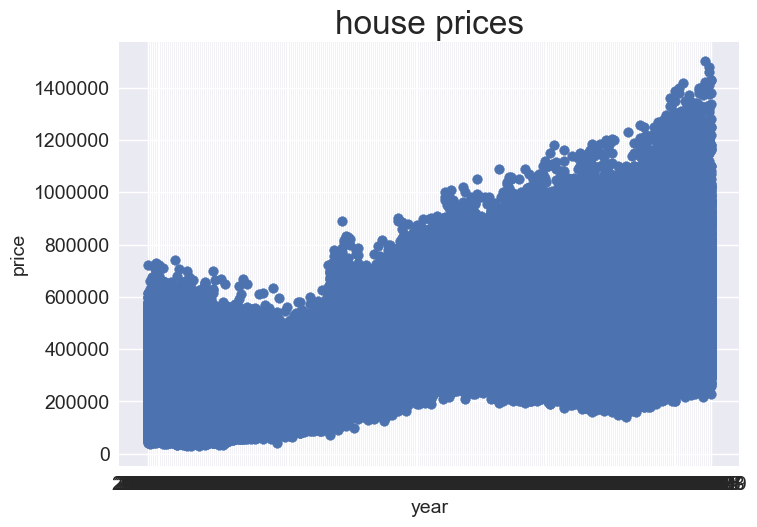

In [26]:
data = np.array(df0)
x, y = data.T
# # formatter = ticker.ScalarFormatter()
# # formatter.set_scientific(False)
# # ax.yaxis.set_major_formatter(formatter)
# plt.scatter(x,y)
# plt.show()

x_values = x
y_values = y

plt.style.use('seaborn')
fig, ax = plt.subplots()
ax.scatter(x_values, y_values)

# Set chart title and label axes.
ax.set_title("house prices", fontsize=24)
ax.set_xlabel("year", fontsize=14)
ax.set_ylabel("price", fontsize=14)

# Set size of tick labels.
ax.tick_params(axis='both', which='major', labelsize=14)

# # Set the range for each axis.
# ax.axis([0, 1100, 0, 1100000])
formatter = ticker.ScalarFormatter()
formatter.set_scientific(False)
ax.yaxis.set_major_formatter(formatter)

plt.show()

In [21]:
import matplotlib.pyplot as plt
from matplotlib import ticker

# additional code before plt.show()
# formatter = ticker.ScalarFormatter()
# formatter.set_scientific(False)
# ax.yaxis.set_major_formatter(formatter)

AttributeError: 'DataFrame' object has no attribute 'yaxis'

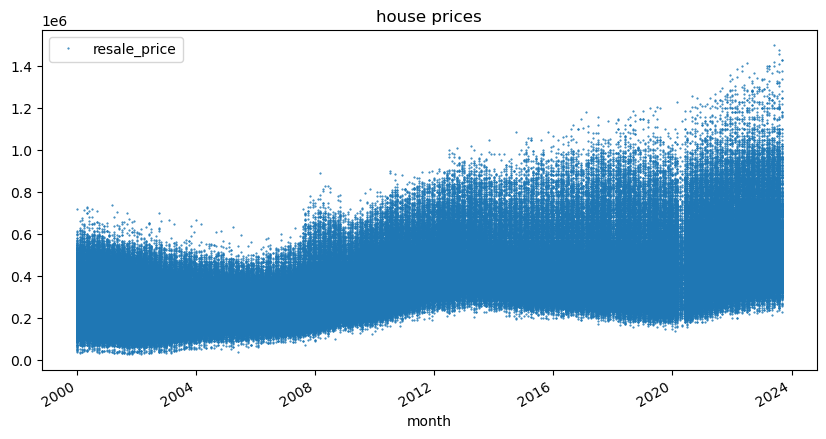

In [22]:
color_pal = sns.color_palette()
# plt.plot(default_x_ticks, y)
pjme0.plot(style='.',
          figsize=(10, 5),
          ms=1,
          color=color_pal[0],
          title='house prices')
formatter = ticker.ScalarFormatter()
formatter.set_scientific(False)
pjme0.yaxis.set_major_formatter(formatter)
plt.show()

In [31]:
# df1 = pd.read_csv("2000-2012formated.csv",index_col=[0],parse_dates=[0])
# df1.head()
df1 = pd.read_csv("2000-2023.csv")
df1=df1.loc[df1['town']=='BEDOK']
df1=df1.loc[df1['flat_type']=='2 ROOM']

# df1[df1['town']=="GEYLANG"]
df1 = df1.drop('town',axis=1)
df1 = df1.drop('flat_type',axis=1)
df1 = df1.drop('block',axis=1)
df1 = df1.drop('street_name',axis=1)
df1 = df1.drop('storey_range',axis=1)
df1 = df1.drop('floor_area_sqm',axis=1)
df1 = df1.drop('flat_model',axis=1)
df1 = df1.drop('lease_commence_date',axis=1)
df1 = df1.drop('remaining_lease',axis=1)
# df1 = pd.read_csv("2000-2012formated.csv",index_col=[0],parse_dates=[0])
df1.head()

,month,resale_price
157,2000-01,120000.0
158,2000-01,96000.0
159,2000-01,126500.0
160,2000-01,118000.0
2537,2000-02,112000.0


In [32]:
df1.to_csv("Bedok2roomall.csv", encoding='utf-8', index=False)

In [1]:
pjme = pd.read_csv('Bedok2roomall.csv',
                   index_col=[0],
                  parse_dates=[0])
pjme.head()

NameError: name 'pd' is not defined

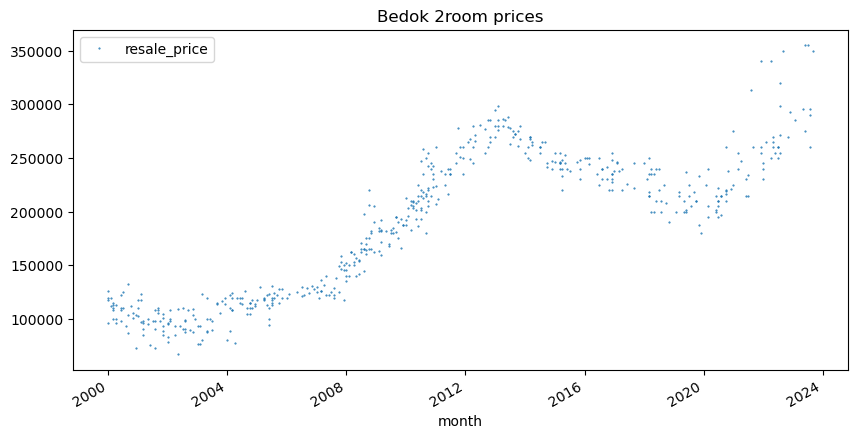

In [34]:
color_pal = sns.color_palette()
pjme.plot(style='.',
          figsize=(10, 5),
          ms=1,
          color=color_pal[0],
          title='Bedok 2room prices')
plt.show()

In [3]:
%pip install prophet

  Using cached prophet-1.1.5-py3-none-macosx_10_9_x86_64.whl (8.8 MB)
  Using cached cmdstanpy-1.2.0-py3-none-any.whl (93 kB)
  Using cached holidays-0.34-py3-none-any.whl (778 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 kB 498.2 kB/s eta 0:00:00a 0:00:01
  Using cached stanio-0.3.0-py3-none-any.whl (6.2 kB)
Note: you may need to restart the kernel to use updated packages.


In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from fbprophet import Prophet

from sklearn.metrics import mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings("ignore")

plt.style.use('ggplot')
plt.style.use('fivethirtyeight')

def mean_absolute_percentage_error(y_true, y_pred): 
    """Calculates MAPE given y_true and y_pred"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


ModuleNotFoundError: No module named 'fbprophet'

In [3]:
# df1 = pd.read_csv("2000-2012formated.csv",index_col=[0],parse_dates=[0])
# df1.head()
df4 = pd.read_csv("2000-2023.csv")
df4=df4.loc[df4['town']=='BEDOK']
df4=df4.loc[df4['flat_type']=='2 ROOM']

# df1[df1['town']=="GEYLANG"]
df4 = df4.drop('town',axis=1)
df4 = df4.drop('flat_type',axis=1)
df4 = df4.drop('block',axis=1)
df4 = df4.drop('street_name',axis=1)
df4 = df4.drop('storey_range',axis=1)
df4 = df4.drop('floor_area_sqm',axis=1)
df4 = df4.drop('flat_model',axis=1)
df4 = df4.drop('lease_commence_date',axis=1)
df4 = df4.drop('remaining_lease',axis=1)
# df1 = pd.read_csv("2000-2012formated.csv",index_col=[0],parse_dates=[0])
df4.head()

,month,resale_price
157,2000-01,120000.0
158,2000-01,96000.0
159,2000-01,126500.0
160,2000-01,118000.0
2537,2000-02,112000.0


In [7]:
df5 = pd.read_csv("historyInflationFormated.csv")
df5.head()

,month,Inflation
0,2000-01,0.00913
1,2000-02,0.01268
2,2000-03,0.01226
3,2000-04,0.01111
4,2000-05,0.00516


In [9]:
#merge inflation and relase price
merged_df = pd.merge(df4, df5, on='month')
merged_df

,month,resale_price,Inflation
0,2000-01,120000.0,0.00913
1,2000-01,96000.0,0.00913
2,2000-01,126500.0,0.00913
3,2000-01,118000.0,0.00913
4,2000-02,112000.0,0.01268
...,...,...,...
509,2023-06,355000.0,0.04514
510,2023-07,355000.0,0.04110
511,2023-08,290000.0,0.04041
512,2023-08,296000.0,0.04041


In [11]:
df6 = pd.read_csv("historyCPIFormated.csv")
df6.head()

,month,CPI
0,2000-01,73.942
1,2000-02,74.294
2,2000-03,74.039
3,2000-04,74.146
4,2000-05,73.878


In [12]:
#merge inflation and relase price
merged_df1 = pd.merge(merged_df, df6, on='month')
merged_df1

,month,resale_price,Inflation,CPI
0,2000-01,120000.0,0.00913,73.942
1,2000-01,96000.0,0.00913,73.942
2,2000-01,126500.0,0.00913,73.942
3,2000-01,118000.0,0.00913,73.942
4,2000-02,112000.0,0.01268,74.294
...,...,...,...,...
527,2023-06,355000.0,0.04514,113.576
528,2023-07,355000.0,0.04110,113.309
529,2023-08,290000.0,0.04041,114.303
530,2023-08,296000.0,0.04041,114.303


In [ ]:
# X = df [['month','Inflation','CPI']]
# if label:
#         y = df[label]
#         return X, y
#     return X